In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")
hep.style.use(hep.style.CMS)
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
data_directory = "/media/miguel/Elements/zdc_data/zdc_lambdadecay_log10discrete_10GeV-250GeV_0.0deg-0.23deg_staggered_h4_04_29_2024/"
file_name = "reco_lambdadecay_discrete_10GeV-250GeV_theta_0.0deg-0.23deg_1934843_0.edm4hep.root"
with ur.open("{file}:events".format(file=data_directory+file_name)) as events:
    zdc_MC = events.arrays(["MCParticles.generatorStatus", "MCParticles.PDG",'MCParticles.mass',
                            'MCParticles.momentum.x', 'MCParticles.momentum.y', 'MCParticles.momentum.z', 'MCParticles.endpoint.z', 
                            'MCParticles.vertex.x', 'MCParticles.vertex.y', 'MCParticles.vertex.z'])
    zdc_reco = events.arrays(["ZDCHcalHitsReco.energy", "ZDCHcalHitsReco.time",
                             "ZDCHcalHitsReco.position.x", "ZDCHcalHitsReco.position.y", "ZDCHcalHitsReco.position.z"])
    zdc_energies = zdc_reco["ZDCHcalHitsReco.energy"]
    zdc_time = zdc_reco["ZDCHcalHitsReco.time"]
    print("Number of events:",events.num_entries)

Number of events: 10000


### Plotting Lambda energy, angle, and decay length

Text(0, 1, '$\\Lambda$ decay vertex (m)')

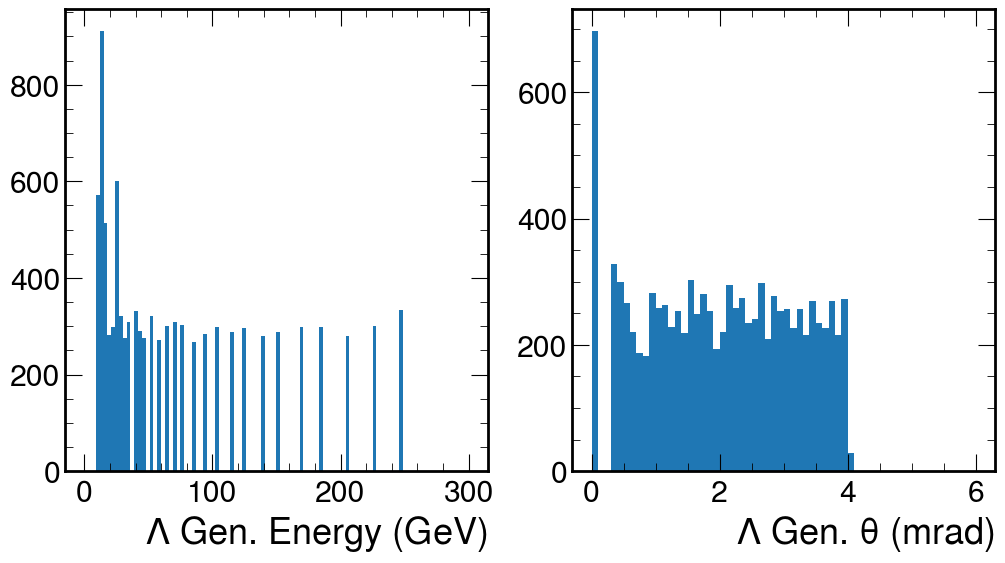

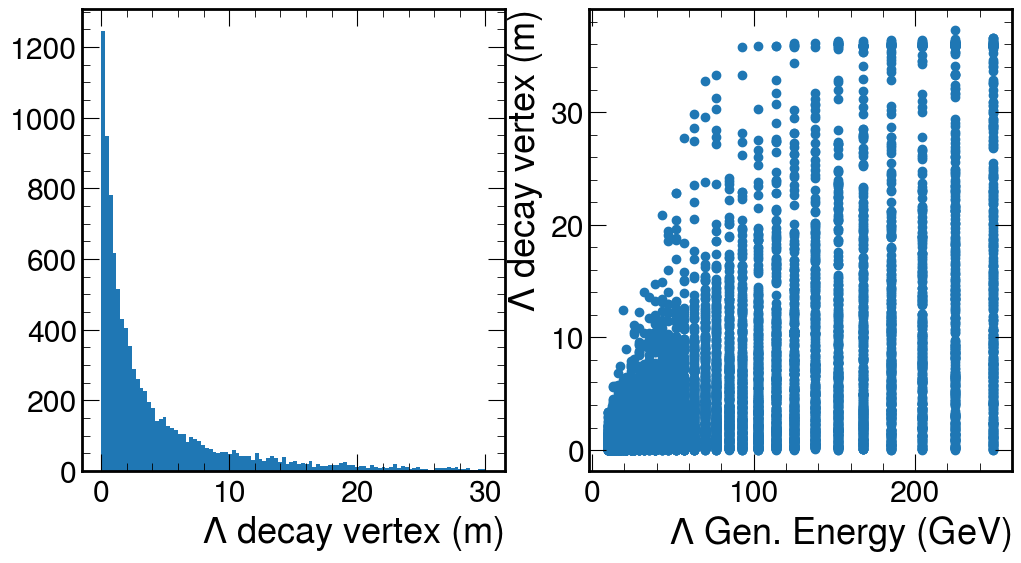

In [3]:
# Mask to get lambda particle
lambda_mask = (zdc_MC["MCParticles.PDG"]==3122) & (zdc_MC["MCParticles.generatorStatus"]==2)

lambda_px = zdc_MC["MCParticles.momentum.x"][lambda_mask]
lambda_py = zdc_MC["MCParticles.momentum.y"][lambda_mask]
lambda_pz = zdc_MC["MCParticles.momentum.z"][lambda_mask]
lambda_mass = zdc_MC["MCParticles.mass"][lambda_mask]

# Calculating Lambda energy and angle
lambda_mom = np.sqrt(lambda_px**2 + lambda_py**2 + lambda_pz**2)
lambda_energy = np.sqrt(lambda_mom**2 + lambda_mass**2)
lambda_theta = np.arccos(lambda_pz/lambda_mom)
lambda_theta_deg = np.degrees(lambda_theta)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(12,6))

ax1.hist(ak.flatten(lambda_energy), bins = 100, range = [0, 300], histtype='stepfilled')
ax1.set_xlabel("$\Lambda$ Gen. Energy (GeV)")

ax2.hist(np.asarray(ak.flatten(lambda_theta))*1000, bins=60, range=[0, 6], histtype='stepfilled')
ax2.set_xlabel("$\Lambda$ Gen. $\\theta$ (mrad)")

fig2, ((ax3, ax4)) = plt.subplots(1,2, figsize=(12,6))

# Getting Lambda end z position
lambda_decay_vz = ak.flatten(zdc_MC["MCParticles.endpoint.z"][lambda_mask])

ax3.hist(lambda_decay_vz/1000., bins = 100, range = [0,30], histtype='stepfilled')
ax3.set_xlabel("$\Lambda$ decay vertex (m)")

ax4.scatter(ak.flatten(lambda_energy), lambda_decay_vz/1000.)
ax4.set_xlabel("$\Lambda$ Gen. Energy (GeV)")
ax4.set_ylabel("$\Lambda$ decay vertex (m)")

### Plotting neutron energy, angle, and vertex

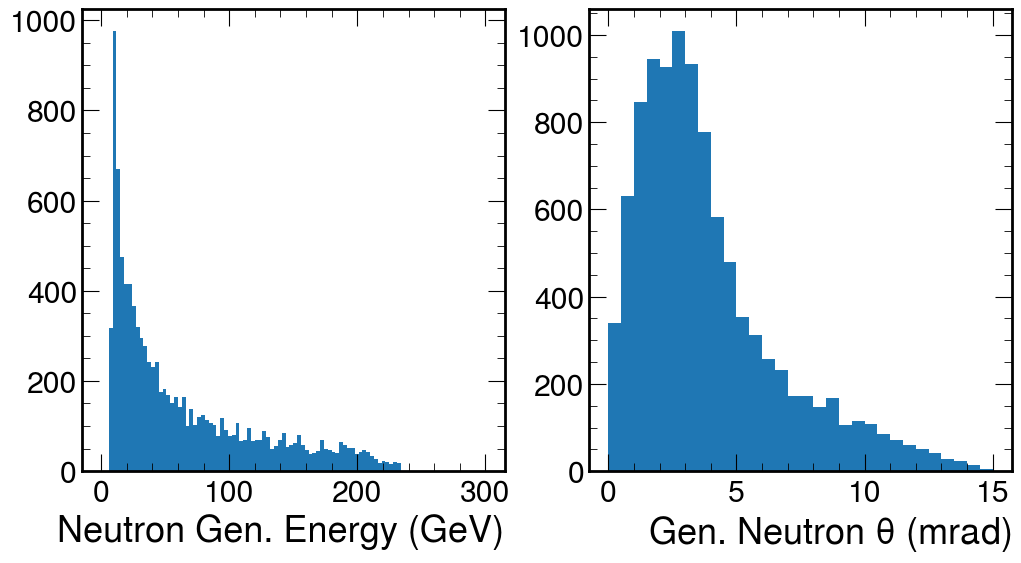

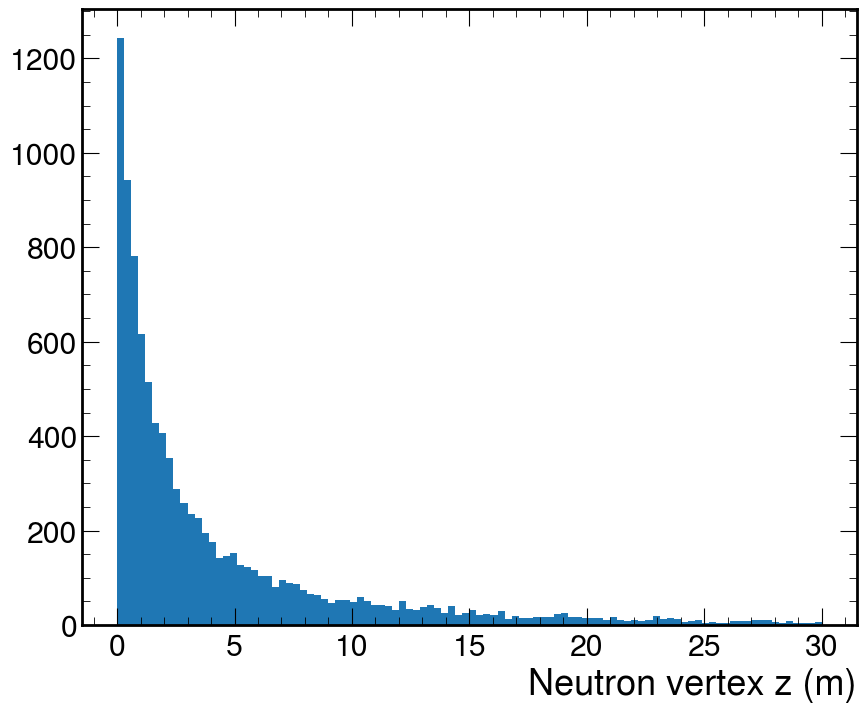

In [4]:
neutron_mask = (zdc_MC["MCParticles.PDG"]==2112) & (zdc_MC["MCParticles.generatorStatus"]==1)

neutron_px = zdc_MC["MCParticles.momentum.x"][neutron_mask]
neutron_py = zdc_MC["MCParticles.momentum.y"][neutron_mask]
neutron_pz = zdc_MC["MCParticles.momentum.z"][neutron_mask]
neutron_mass = zdc_MC["MCParticles.mass"][neutron_mask]

# Calculating neutron energy and angle
neutron_mom = np.sqrt(neutron_px**2 + neutron_py**2 + neutron_pz**2)
neutron_energy = np.sqrt(neutron_mom**2 + neutron_mass**2)
neutron_theta = np.arccos(neutron_pz/neutron_mom)
neutron_theta_deg = np.degrees(neutron_theta)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(12,6))

ax1.hist(ak.flatten(neutron_energy), bins = 100, range = [0, 300], histtype='stepfilled')
ax1.set_xlabel("Neutron Gen. Energy (GeV)")

ax2.hist(np.asarray(ak.flatten(neutron_theta))*1000, bins=30, range=[0, 15], histtype='stepfilled')
ax2.set_xlabel('Gen. Neutron $\\theta$ (mrad)')

# Getting neutron vertex z position
neutron_z_vertex = ak.flatten(zdc_MC["MCParticles.vertex.z"][neutron_mask])

fig = plt.figure(figsize=(10,8))
plt.hist(neutron_z_vertex/1000., bins = 100, range = [0,30], histtype='stepfilled')
plt.xlabel("Neutron vertex z (m)");

### Plotting pi0 energy, angle, and vertex

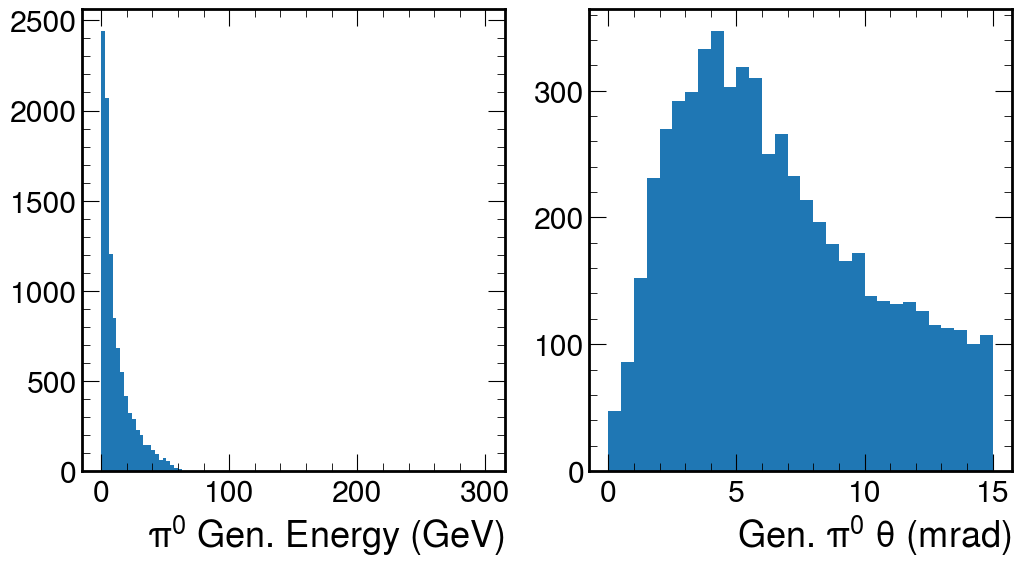

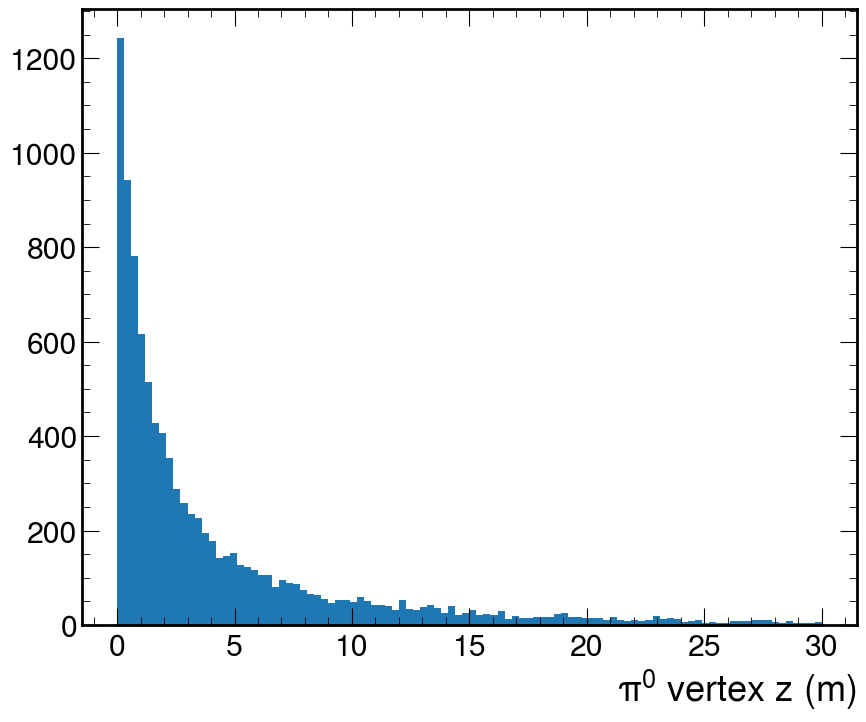

In [5]:
pi0_mask = (zdc_MC["MCParticles.PDG"]==111) & (zdc_MC["MCParticles.generatorStatus"]==2)

pi0_px = zdc_MC["MCParticles.momentum.x"][pi0_mask]
pi0_py = zdc_MC["MCParticles.momentum.y"][pi0_mask]
pi0_pz = zdc_MC["MCParticles.momentum.z"][pi0_mask]
pi0_mass = zdc_MC["MCParticles.mass"][pi0_mask]

# Calculating various quantites of pi0
pi0_mom = np.sqrt(pi0_px**2 + pi0_py**2 + pi0_pz**2)
pi0_energy = np.sqrt(pi0_mom**2 + pi0_mass**2)
pi0_theta = np.arccos(pi0_pz/pi0_mom)
pi0_theta_deg = np.degrees(pi0_theta)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(12,6))

ax1.hist(ak.flatten(pi0_energy), bins = 100, range = [0, 300], histtype='stepfilled')
ax1.set_xlabel("$\pi^{0}$ Gen. Energy (GeV)")

ax2.hist(np.asarray(ak.flatten(pi0_theta))*1000, bins=30, range=[0, 15], histtype='stepfilled')
ax2.set_xlabel('Gen. $\pi^{0}$ $\\theta$ (mrad)')

pi0_z_vertex = ak.flatten(zdc_MC["MCParticles.vertex.z"][pi0_mask])

fig = plt.figure(figsize=(10,8))
plt.hist(pi0_z_vertex/1000., bins = 100, range = [0,30], histtype='stepfilled')
plt.xlabel("$\pi^{0}$ vertex z (m)");

### Checking energy conservation between particles

Text(0, 1, 'Neutron + 2 $\\gamma$ gen. E (GeV)')

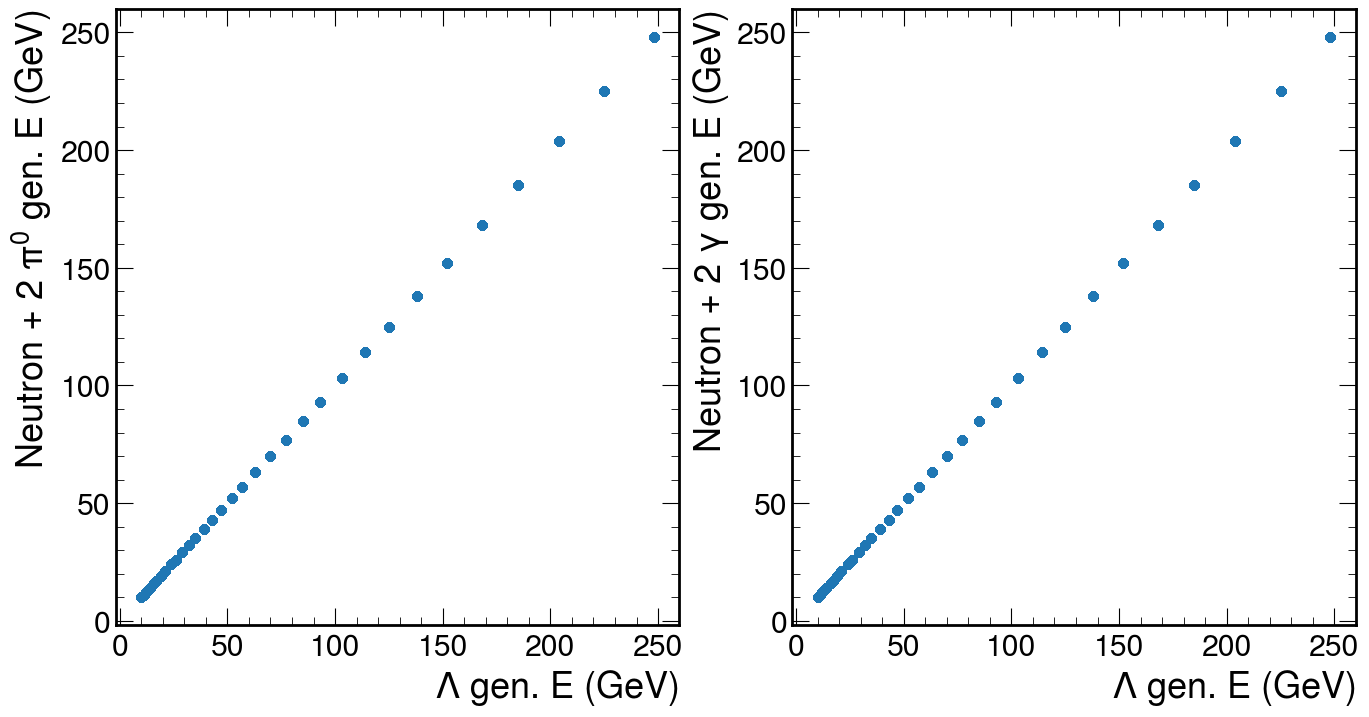

In [6]:
# Summing neutron and pi0 energies
pi0_neutron_energy = ak.flatten(pi0_energy) + ak.flatten(neutron_energy)

# Getting photon energies (from pi0 decay) and summing with neutron energy
photon_mask = (zdc_MC["MCParticles.PDG"]==22) & (zdc_MC["MCParticles.generatorStatus"]==1)
photon_px = zdc_MC["MCParticles.momentum.x"][photon_mask]
photon_py = zdc_MC["MCParticles.momentum.y"][photon_mask]
photon_pz = zdc_MC["MCParticles.momentum.z"][photon_mask]
# Calculating various quantites of lambda
total_photon_mom = ak.sum(np.sqrt(photon_px**2 + photon_py**2 + photon_pz**2), axis = 1)
photon_neutron_energy = total_photon_mom + ak.flatten(neutron_energy)
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(16,8))

ax1.scatter(ak.flatten(lambda_energy), pi0_neutron_energy)
ax1.set_xlabel("$\Lambda$ gen. E (GeV)")
ax1.set_ylabel("Neutron + 2 $\pi^{0}$ gen. E (GeV)")

ax2.scatter(ak.flatten(lambda_energy), photon_neutron_energy)
ax2.set_xlabel("$\Lambda$ gen. E (GeV)")
ax2.set_ylabel("Neutron + 2 $\gamma$ gen. E (GeV)")


### Checking ZDC cell energies and positions

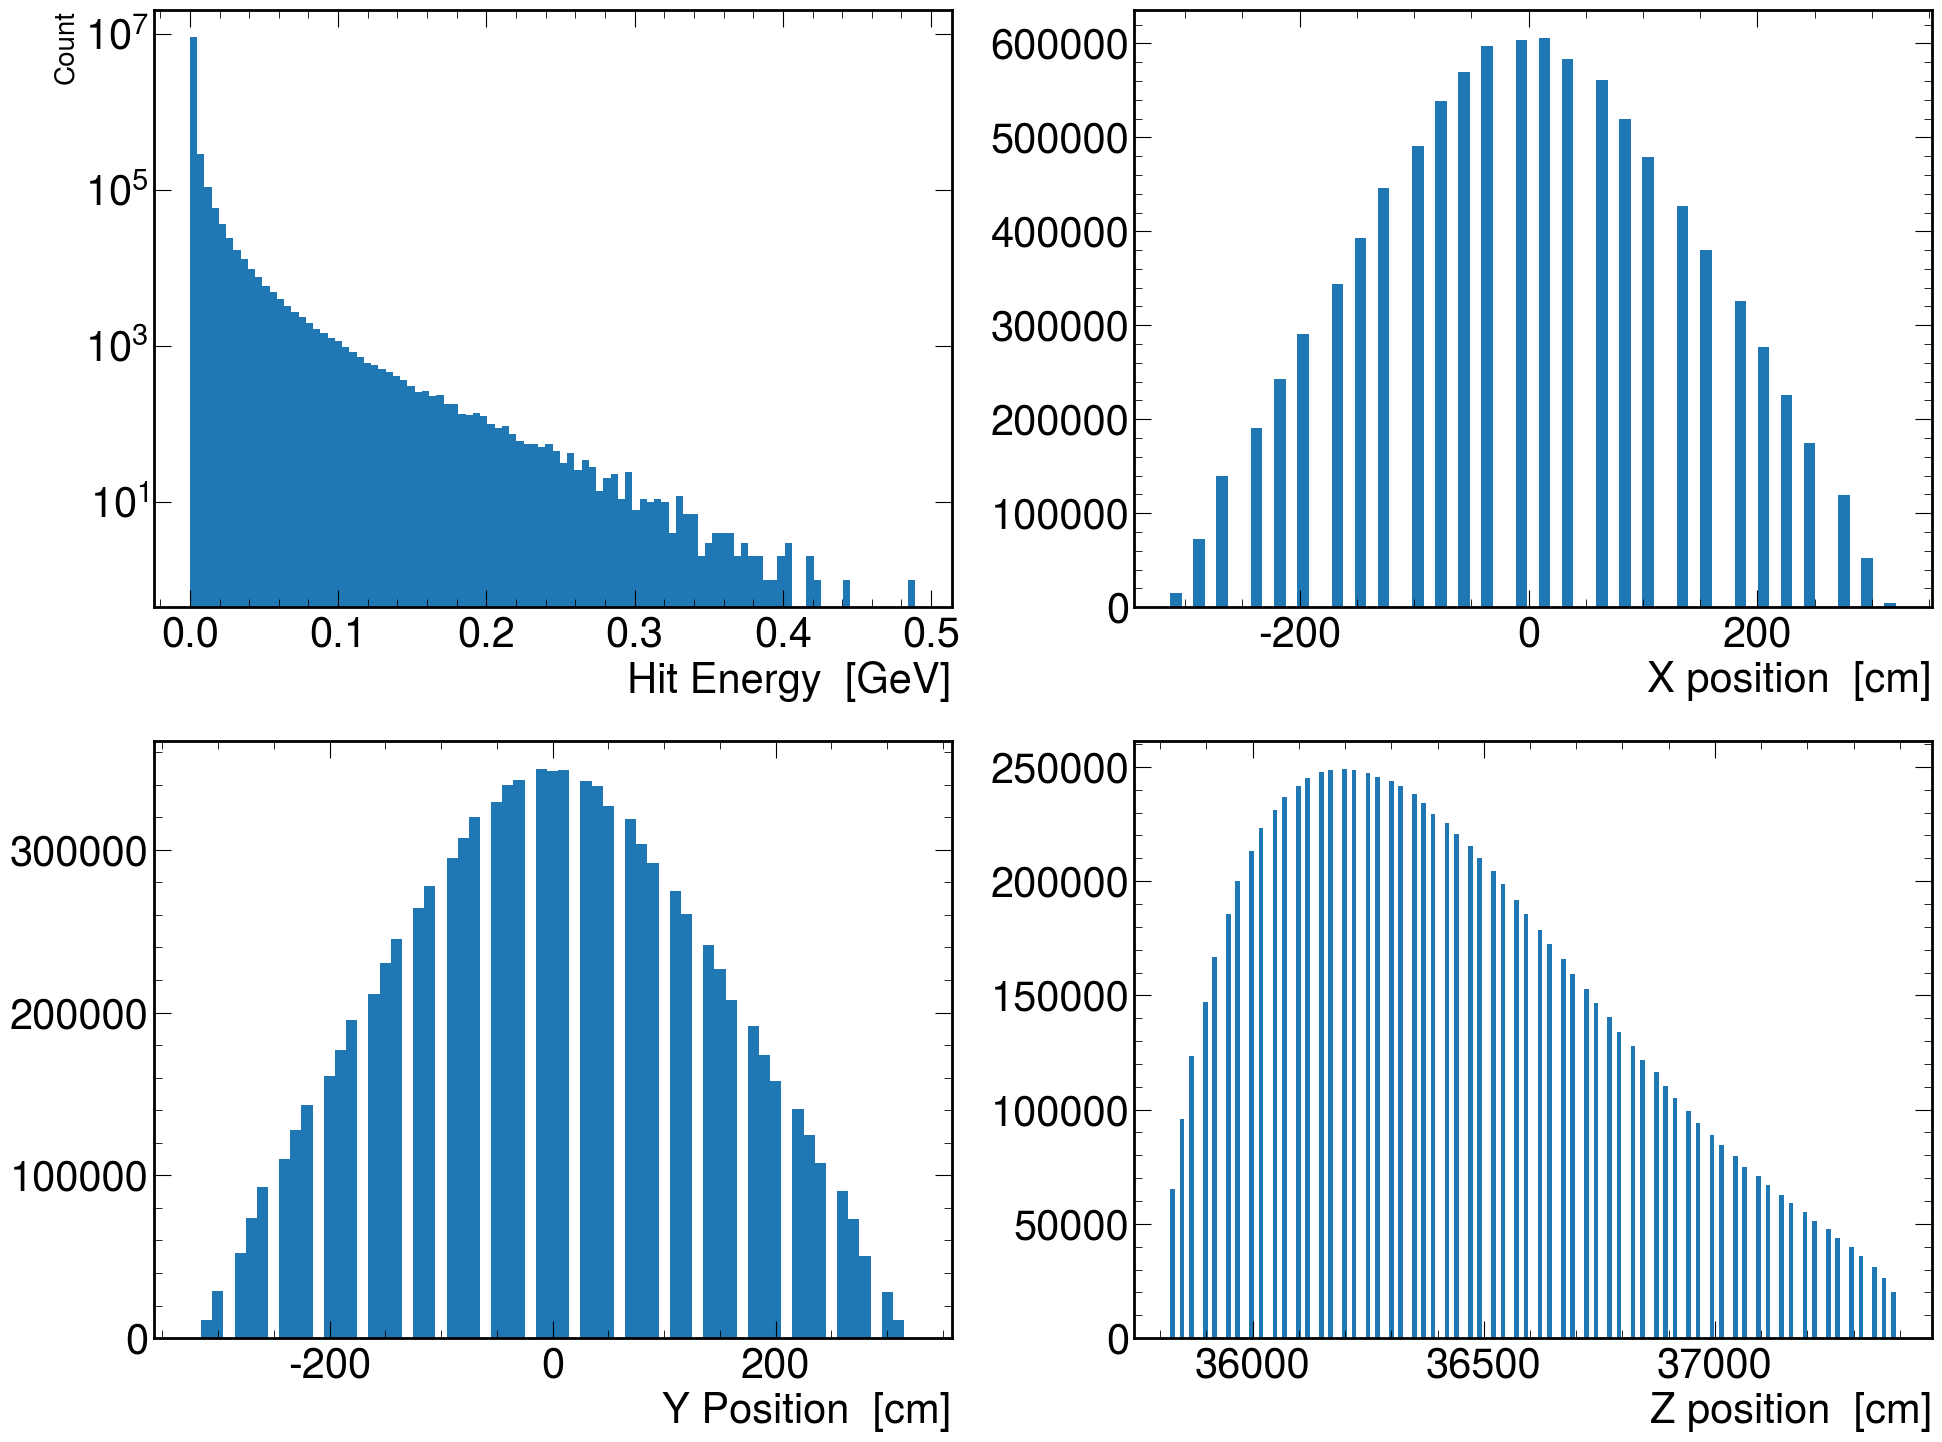

In [7]:
nrows=2
ncols=2
zdc_x_pos = zdc_reco["ZDCHcalHitsReco.position.x"]
zdc_y_pos = zdc_reco["ZDCHcalHitsReco.position.y"]
zdc_z_pos = zdc_reco["ZDCHcalHitsReco.position.z"]

fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[zdc_energies, zdc_x_pos, zdc_y_pos, zdc_z_pos]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    irow=int(index/nrows)
    icol=index%ncols
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
    
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
    else:    
        nbins=int((max_range-min_range)/10.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [cm]", fontsize=30)
        
    ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
plt.tight_layout()
# pdf_pages.savefig(fig2,   bbox_inches='tight')



### 2D histograms of x, y positions and x,y momenta

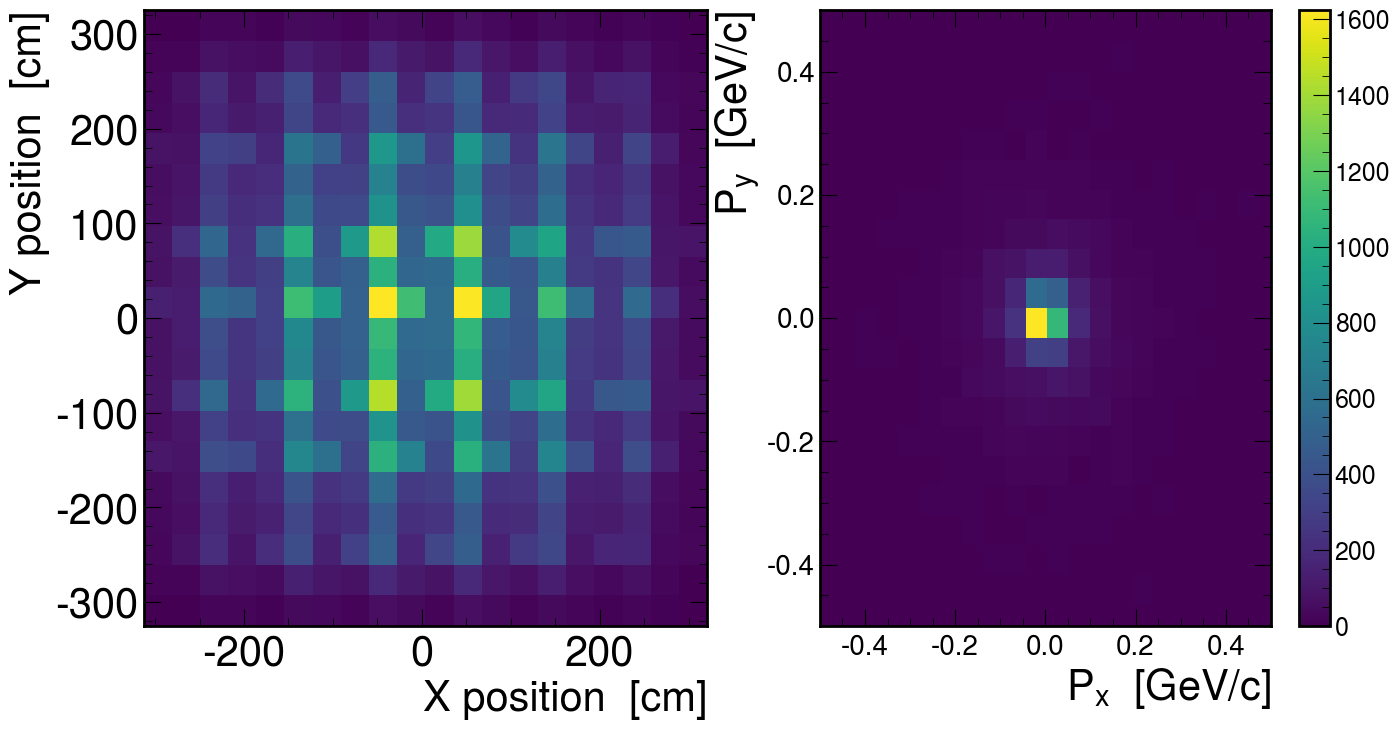

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
xrange=np.max(ak.flatten(zdc_x_pos))
xrange_min=np.min(ak.flatten(zdc_x_pos))

yrange=np.max(ak.flatten(zdc_y_pos))
yrange_min=np.min(ak.flatten(zdc_y_pos))


ax[0].hist2d(np.array(ak.flatten(zdc_x_pos)), np.array(ak.flatten(zdc_y_pos)), bins=(20, 20), cmap=plt.cm.viridis)

ax[0].set_xlim(xrange_min, xrange)
ax[0].set_ylim(yrange_min, yrange)
ax[0].set_xlabel("X position  [cm]", fontsize=30)
ax[0].set_ylabel("Y position  [cm]", fontsize=30)
ax[0].yaxis.set_tick_params(labelsize=30)
ax[0].xaxis.set_tick_params(labelsize=30)

xrange=np.max(ak.flatten(lambda_px))
xrange_min=np.min(ak.flatten(lambda_px))

yrange=np.max(ak.flatten(lambda_py))
yrange_min=np.min(ak.flatten(lambda_py))

h=ax[1].hist2d(np.array(ak.flatten(lambda_px)),np.array(ak.flatten(lambda_py)), bins=(40, 40), cmap=plt.cm.viridis)
cbar = plt.colorbar(h[3])
cbar.ax.tick_params(labelsize=18)
ax[1].set_xlim(-.5, .5)
ax[1].set_ylim(-.5, .5)
ax[1].set_xlabel("$P_{x}$  [GeV/c]", fontsize=30)
ax[1].set_ylabel("$P_{y}$  [GeV/c]", fontsize=30)

ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
# pdf_pages.savefig(fig3,   bbox_inches='tight')




### Plotting ZDC reconstructed energy in each event

Text(0.5, 1.0, 'ZDC $\\Lambda$ decay: 10-250 GeV')

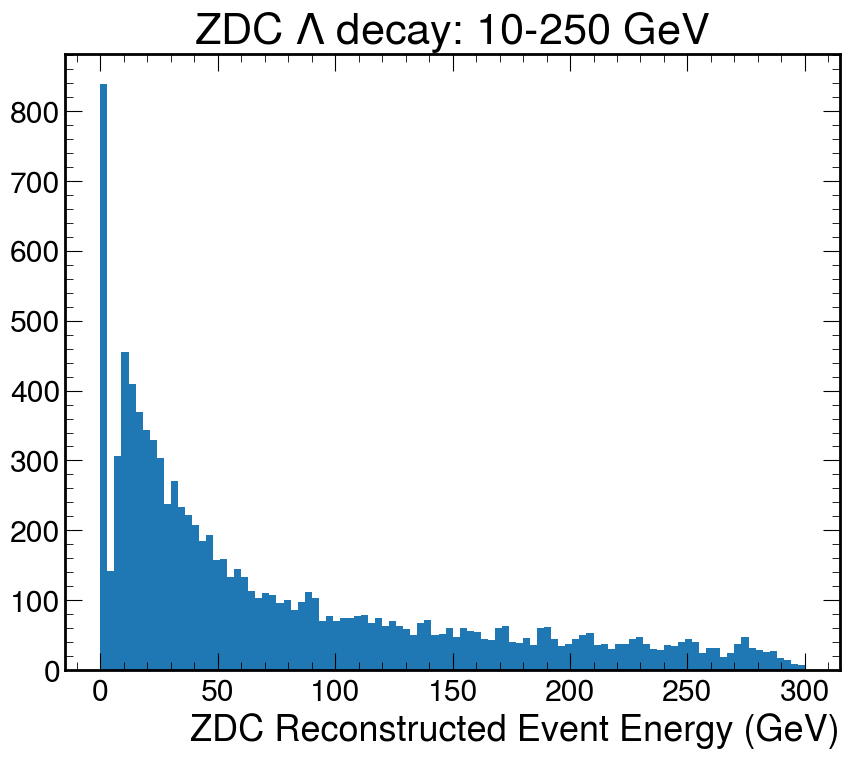

In [9]:
fig = plt.figure(figsize=(10,8))

sampling_fraction=0.02
MIP_TH=0.5*0.0006
time_TH=275
condition1 = zdc_energies > MIP_TH
condition2= zdc_time < time_TH
combined_mask = condition1 & condition2
event_energy = np.asarray(ak.sum(zdc_energies[combined_mask], axis = 1))

reconstructed_event_energy = np.divide(event_energy, .02)
plt.hist(reconstructed_event_energy, 100, range=[0, 300], histtype='stepfilled')
plt.xlabel("ZDC Reconstructed Event Energy (GeV)")
plt.title("ZDC $\Lambda$ decay: 10-250 GeV")

### Reconstructed energy vs Lambda energy

Text(0, 1, '$E_{reco}$ (GeV)')

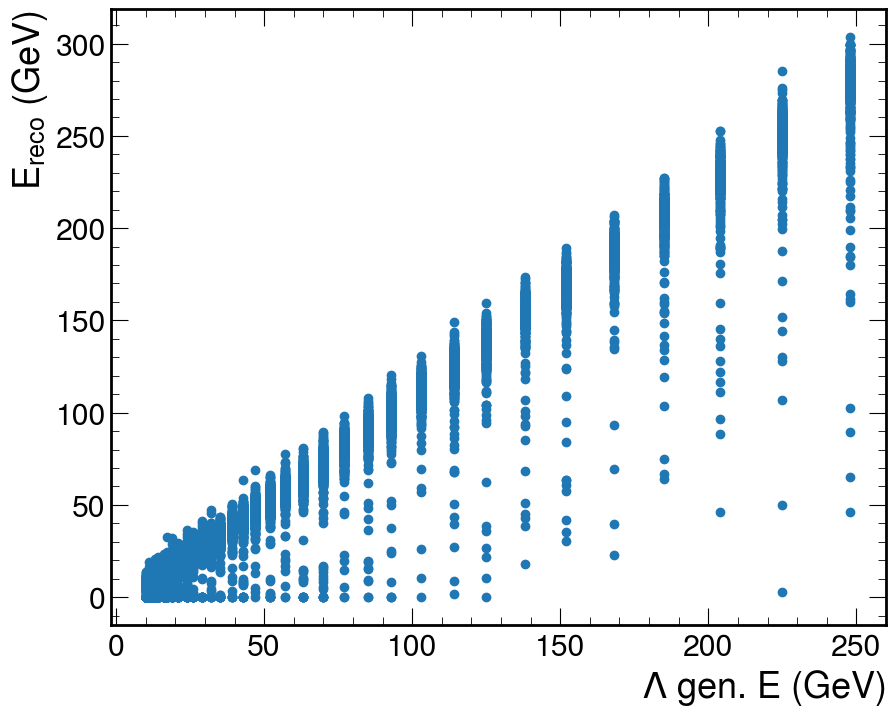

In [10]:
fig = plt.figure(figsize=(10,8))

plt.scatter(ak.flatten(lambda_energy), reconstructed_event_energy)
plt.xlabel("$\Lambda$ gen. E (GeV)")
plt.ylabel("$E_{reco}$ (GeV)")

### Event displays for a few events

125.0049710828793


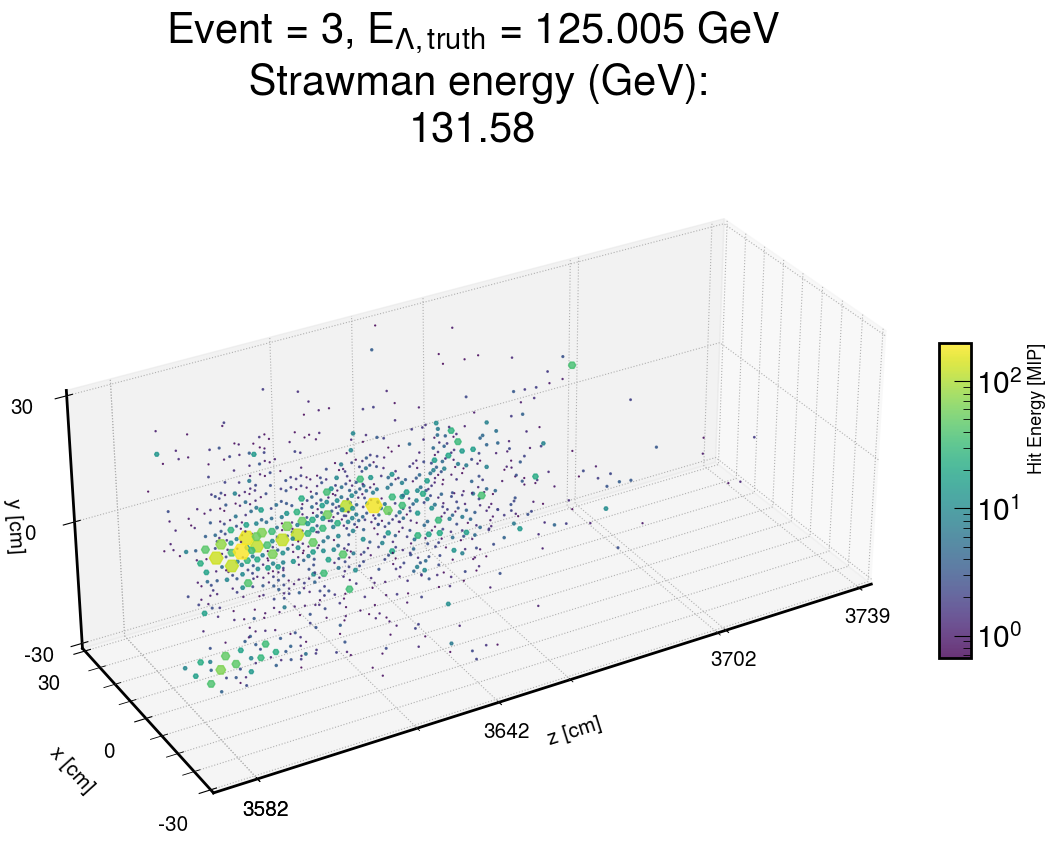

204.0030699794895


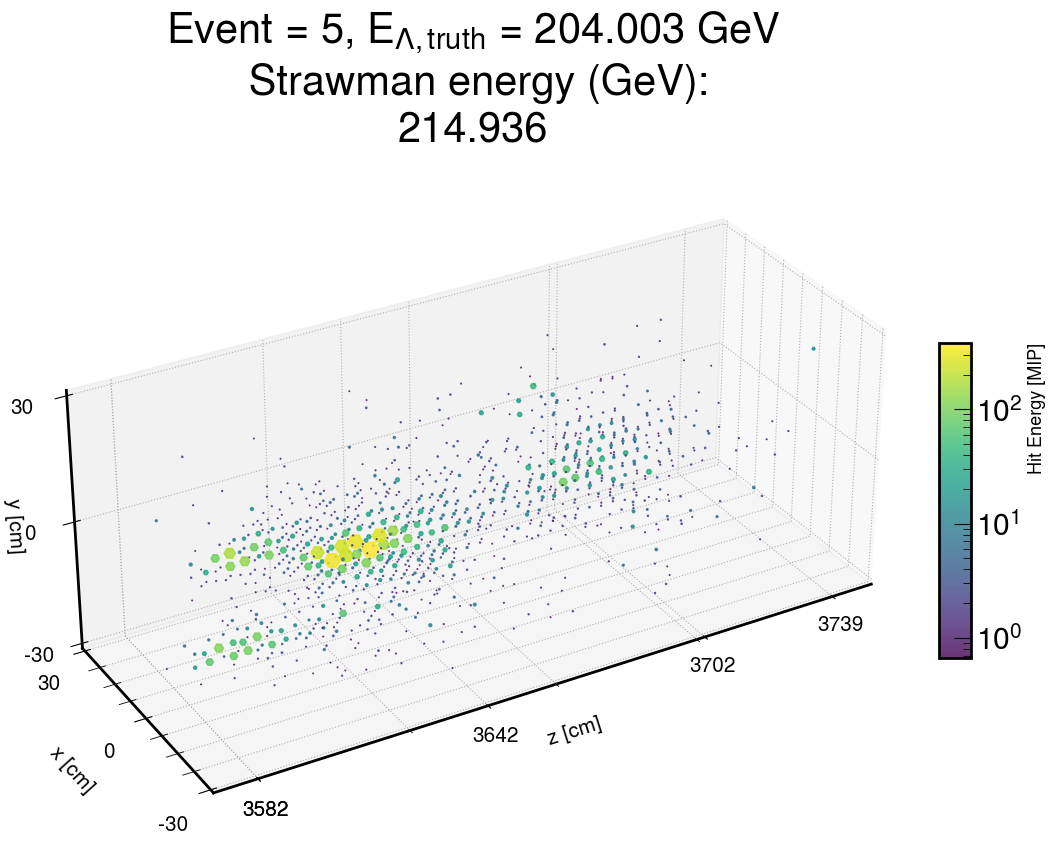

248.00250956100524


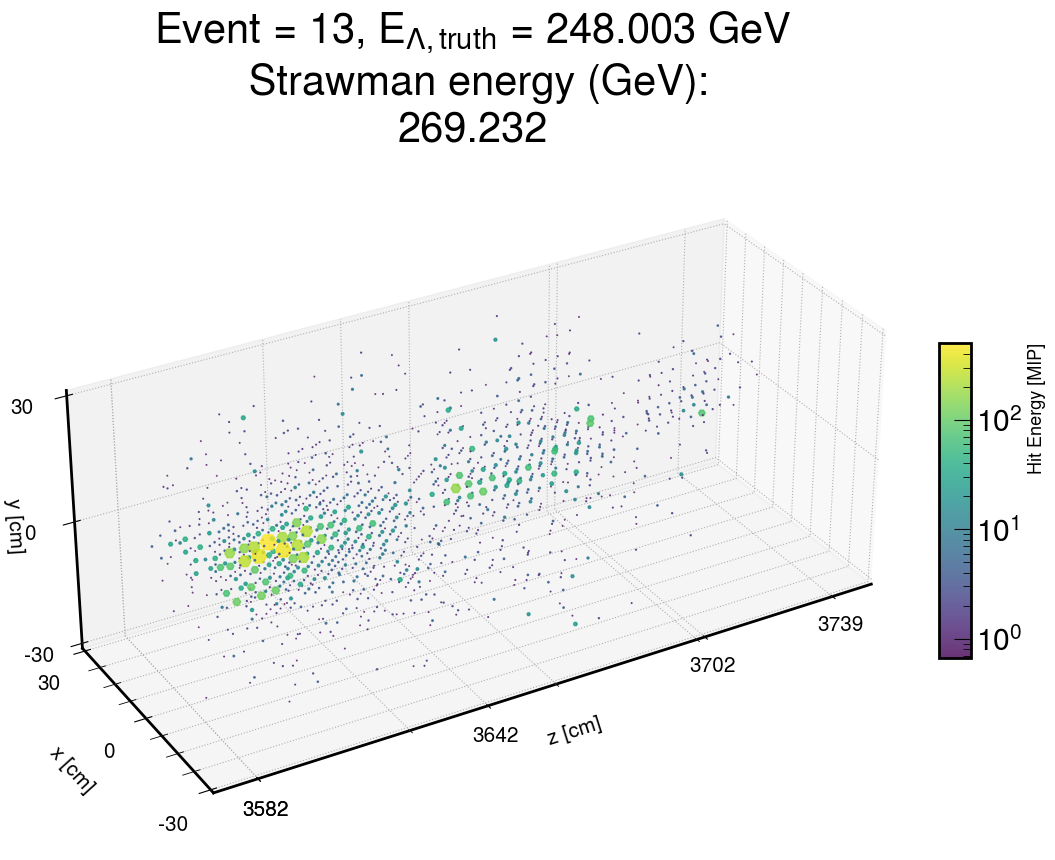

85.00732173499227


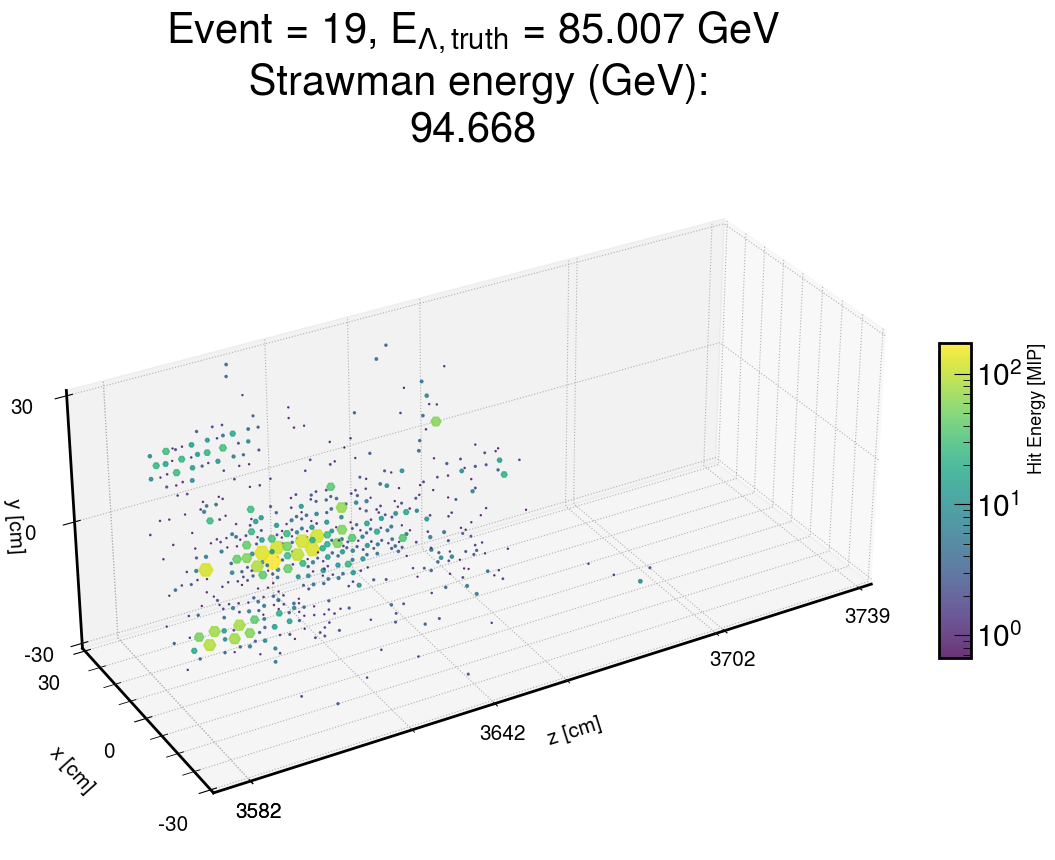

93.00669195577537


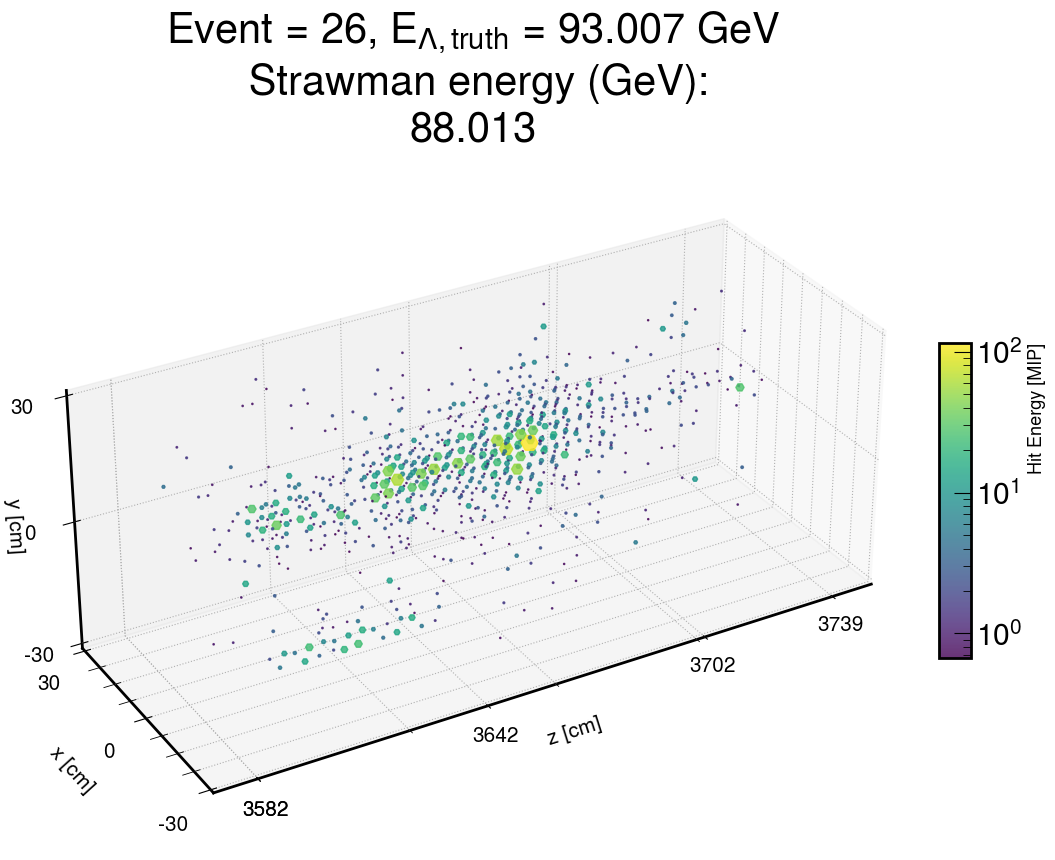

125.00498670725696


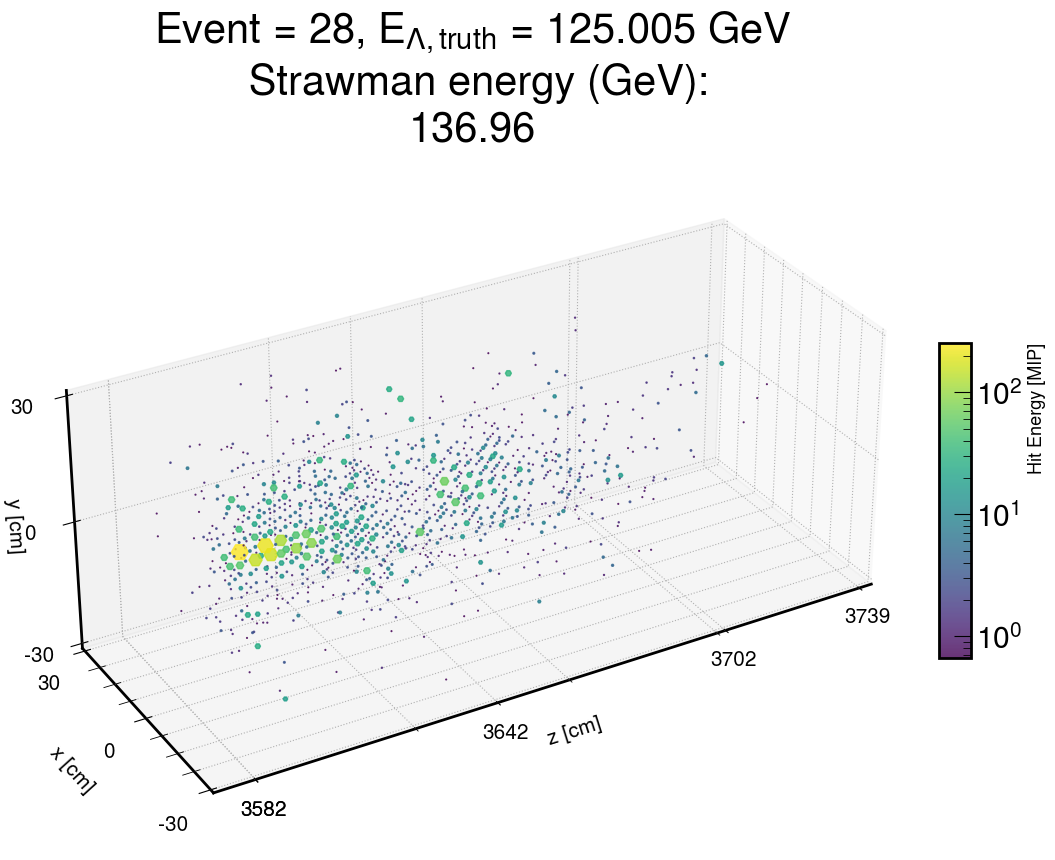

152.00409451247188


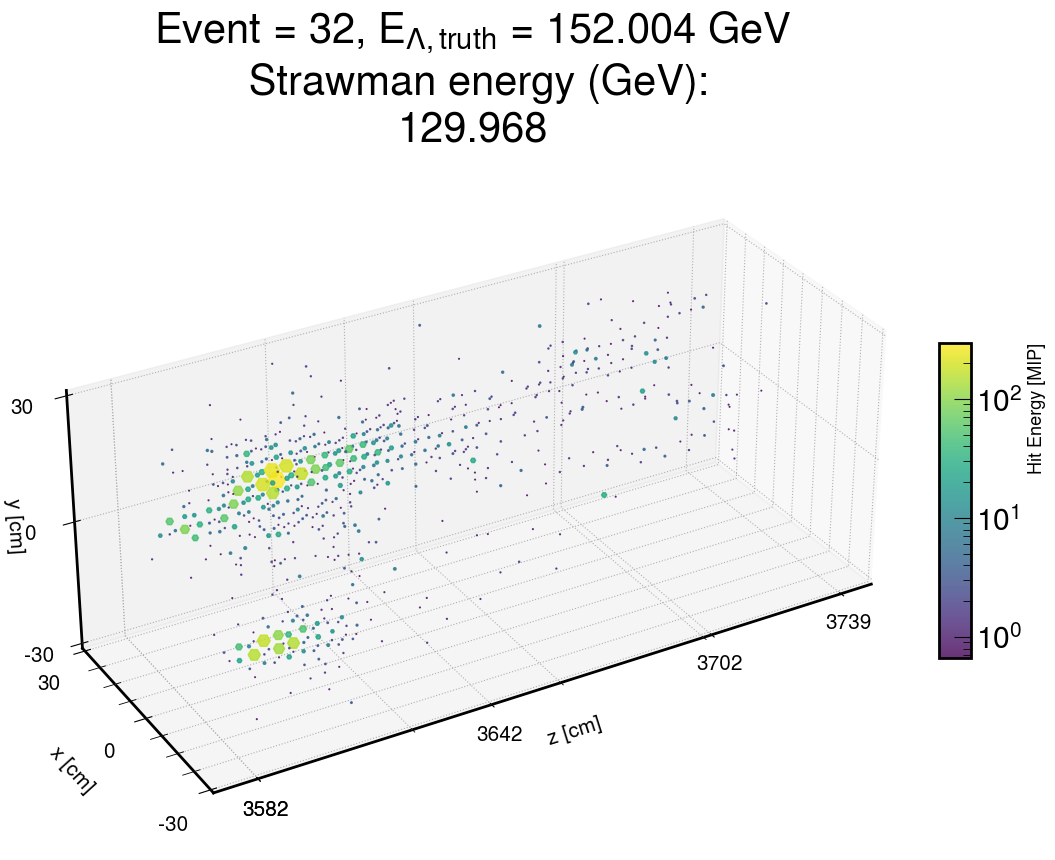

168.00370456795434


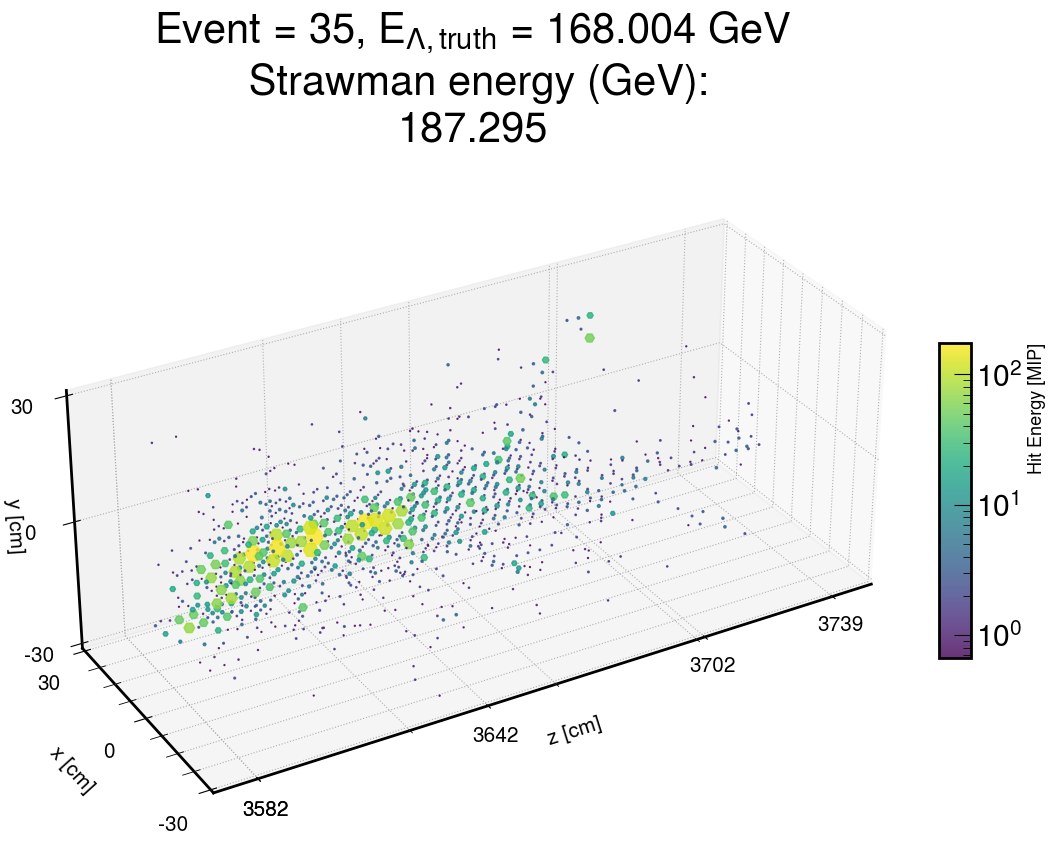

In [28]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
import sys  

hep.style.use("CMS")
#MIP=0.0006
MIP= 0.000472


def get_XYZ_dim(posx, posy, posz):
    x_min=int(np.min(ak.flatten(posx)))
    x_max=int (np.max(ak.flatten(posx)))
    
    y_min=int(np.min(ak.flatten(posy)))
    y_max=int(np.max(ak.flatten(posy)))
    
    z_min=int(np.min(ak.flatten(posz)))
    z_max=int(np.max(ak.flatten(posz)))
    
    return x_min, x_max, y_min, y_max, z_min, z_max
def draw_event(fig, MC_array, reco_array, event):
    scale_canvas=0.9
        
    MIP_TH=0.5 * 0.0006
    TIME_TH=275.0
    sampling_fraction=0.021
        
    ax1 = fig.add_subplot(211, projection='3d',azim=-120, elev=30)
    
    my_cmap = plt.get_cmap('viridis')
    
    cell_energies = reco_array["ZDCHcalHitsReco.energy"][event]
    cell_times = reco_array["ZDCHcalHitsReco.time"][event]
    
    nhits=len(cell_energies)

    cell_x=reco_array['ZDCHcalHitsReco.position.x'][event]/10.
    cell_y=reco_array['ZDCHcalHitsReco.position.y'][event]/10.
    cell_z=reco_array['ZDCHcalHitsReco.position.z'][event]/10.
    
    lambda_mask = (MC_array["MCParticles.PDG"]==3122) & (MC_array["MCParticles.generatorStatus"]==2)
    lambda_px = MC_array['MCParticles.momentum.x'][lambda_mask][event]
    lambda_py = MC_array['MCParticles.momentum.y'][lambda_mask][event]
    lambda_pz = MC_array['MCParticles.momentum.z'][lambda_mask][event]
    lambda_mass = MC_array["MCParticles.mass"][lambda_mask][event]
    

    # Calculating various quantites of lambda
    lambda_mom = np.sqrt(lambda_px**2 + lambda_py**2 + lambda_pz**2)
    lambda_energy = np.sqrt(lambda_mom**2 + lambda_mass**2)[0]
    print(lambda_energy)
    lambda_theta=np.arccos(lambda_pz/lambda_mom)*1000
    slc=(cell_energies>MIP_TH) & (cell_times<TIME_TH)
    sctt3d = ax1.scatter3D(cell_z[slc], cell_x[slc], cell_y[slc],
                    alpha = 0.8,
                    c = cell_energies[slc]/MIP,
                    s=150*cell_energies[slc]/np.max(cell_energies[slc]),
                    cmap = my_cmap,
                    norm=mpl.colors.LogNorm(),
                    marker ='H')
    
    
    cbar = plt.colorbar(sctt3d, shrink=0.45, pad=0.05, aspect=10)
    cbar.set_label('Hit Energy [MIP]', fontsize=13)
    
    
    x_min, x_max, y_min, y_max, z_min, z_max=get_XYZ_dim(reco_array['ZDCHcalHitsReco.position.x']/10.,\
                                                        reco_array['ZDCHcalHitsReco.position.y']/10.,\
                                                        reco_array['ZDCHcalHitsReco.position.z']/10.)
    max_val_for_plot=round(np.max([x_max, y_max])/10) *10
    
    plt.ylim(-max_val_for_plot,max_val_for_plot) #x
    plt.gca().set_zlim(-max_val_for_plot, max_val_for_plot) #y    
    z_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
    y_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
    
    ax1.set_zticks(z_ticks)
    ax1.set_yticks(y_ticks)
    specific_values = np.array([z_min, z_max])
   
    x_ticks = np.arange(z_min, z_max, 60)

    x_ticks = np.concatenate([specific_values, x_ticks])
    ax1.set_xticks(x_ticks)
    
    plt.gca().zaxis.labelpad = -2
    ax1.set_title(f"Event = {event}, $E_{{\Lambda, truth}}$ = {round(lambda_energy, 3)} GeV\n Strawman energy (GeV):\n{round(ak.sum(cell_energies[slc])/sampling_fraction,3)}",
                  fontsize=30, pad=-500)
    plt.gca().set_xlabel("\nz [cm]", fontsize=15)
    plt.gca().set_ylabel("\nx [cm]", fontsize=15)
    plt.gca().set_zlabel("y [cm]", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().zaxis.set_tick_params(labelsize=15)
    
    plt.gca().set_box_aspect((180,70,70), zoom=1.2)
    #plt.show()
    return ax1


fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 3)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 5)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 13)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 19)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 26)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 28)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 32)
plt.show()

fig=plt.figure( figsize=(30,20))
draw_event(fig, zdc_MC, zdc_reco, 35)
plt.show()